In [1]:
# 📍 Import basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# 🗂️ Load datasets
data_dir = "../data"

train = pd.read_csv(os.path.join(data_dir, "train.csv"))
test = pd.read_csv(os.path.join(data_dir, "test.csv"))
transactions = pd.read_csv(os.path.join(data_dir, "transactions.csv"))

# 📌 View basic structure
print("Train:\n", train.head())
print("\nTest:\n", test.head())
print("\nTransactions:\n", transactions.head())

# 🧼 Check for nulls
print("\nMissing values:\n")
print("Train:\n", train.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Train:
           doj  srcid  destid  final_seatcount
0  2023-03-01     45      46           2838.0
1  2023-03-01     46      45           2298.0
2  2023-03-01     45      47           2720.0
3  2023-03-01     47      45           2580.0
4  2023-03-01     46       9           4185.0

Test:
           route_key         doj  srcid  destid
0  2025-02-11_46_45  2025-02-11     46      45
1  2025-01-20_17_23  2025-01-20     17      23
2  2025-01-08_02_14  2025-01-08      2      14
3  2025-01-08_08_47  2025-01-08      8      47
4  2025-01-08_09_46  2025-01-08      9      46

Transactions:
           doj         doi  srcid  destid    srcid_region   destid_region  \
0  2023-03-01  2023-01-30     45      46       Karnataka      Tamil Nadu   
1  2023-03-01  2023-01-30     46      45      Tamil Nadu       Karnataka   
2  2023-03-01  2023-01-30     45      47       Karnataka  Andhra Pradesh   
3  2023-03-01  2023-01-30     47      45  Andhra Pradesh       Karnataka   
4  2023-03-01  2023-01-30     

In [3]:
# 🔍 Convert dates
train["doj"] = pd.to_datetime(train["doj"])
transactions["doj"] = pd.to_datetime(transactions["doj"])
transactions["doi"] = pd.to_datetime(transactions["doi"])


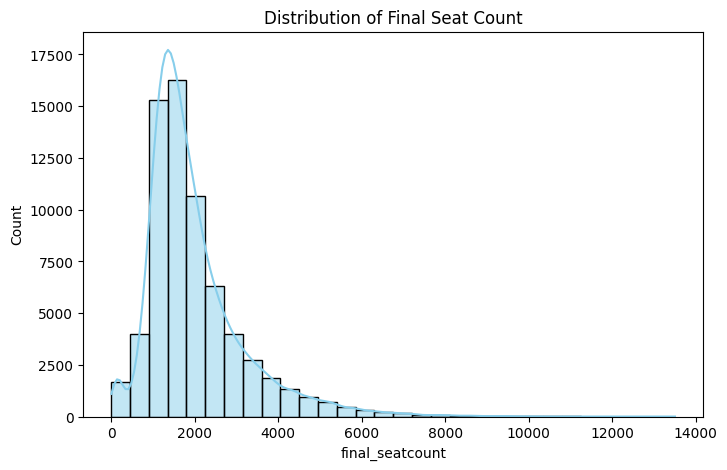

In [4]:
# 📊 Distribution of final_seatcount
plt.figure(figsize=(8,5))
sns.histplot(train['final_seatcount'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Final Seat Count")
plt.show()

In [6]:
# 🎯 Top Source-Destination pairs with high bookings
route_stats = train.groupby(['srcid', 'destid'])['final_seatcount'].sum().reset_index()
route_stats = route_stats.sort_values(by='final_seatcount', ascending=False)
print("\nTop 10 High-Demand Routes:")
print(route_stats.head(10))



Top 10 High-Demand Routes:
    srcid  destid  final_seatcount
76     46       9        3329757.0
20      9      46        3235467.0
86     46      48        3062331.0
73     45      46        2834932.0
99     48      46        2791752.0
84     46      45        2717952.0
74     45      47        2703074.0
96     47      45        2698670.0
19      9      45        2170173.0
67     45       9        2139015.0


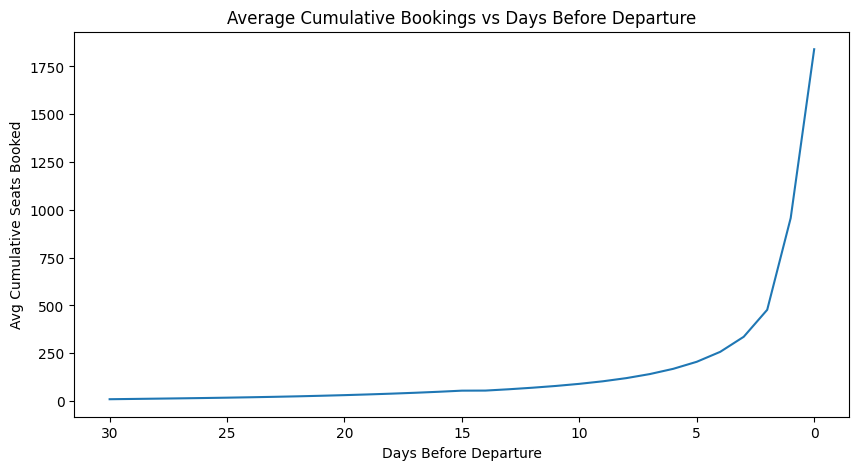

In [7]:
# 📈 Analyze booking window effect (DBD)
plt.figure(figsize=(10,5))
sns.lineplot(data=transactions.groupby('dbd')['cumsum_seatcount'].mean().reset_index(), x='dbd', y='cumsum_seatcount')
plt.title("Average Cumulative Bookings vs Days Before Departure")
plt.gca().invert_xaxis()
plt.xlabel("Days Before Departure")
plt.ylabel("Avg Cumulative Seats Booked")
plt.show()

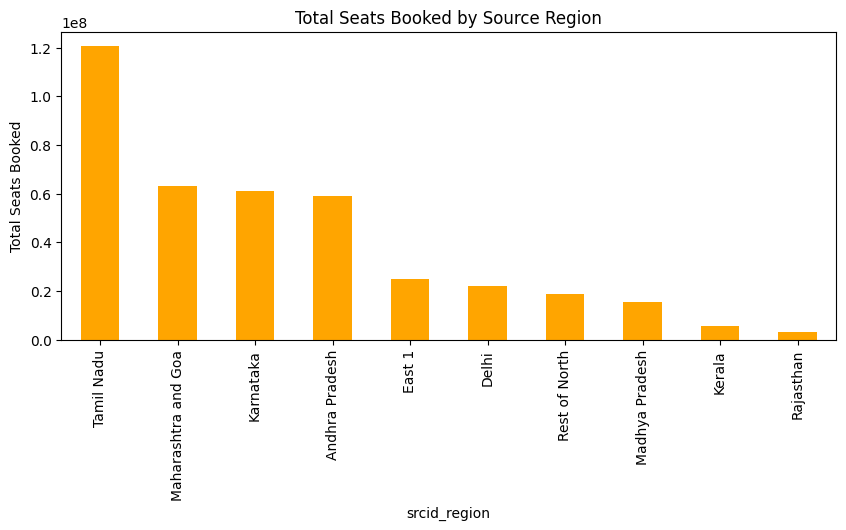

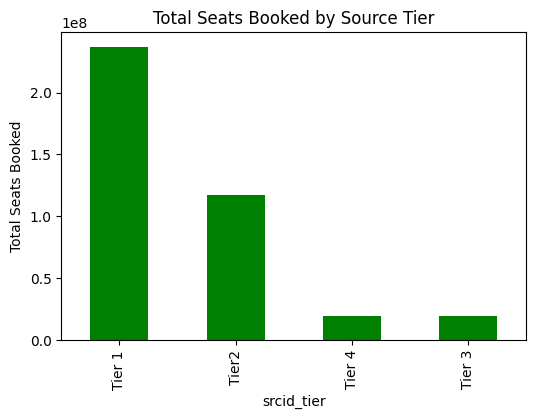

In [8]:
# 📍 Booking trend across regions and tiers
region_trend = transactions.groupby('srcid_region')['cumsum_seatcount'].sum().sort_values(ascending=False)
region_trend.plot(kind='bar', figsize=(10,4), title="Total Seats Booked by Source Region", color='orange')
plt.ylabel("Total Seats Booked")
plt.show()

tier_trend = transactions.groupby('srcid_tier')['cumsum_seatcount'].sum().sort_values(ascending=False)
tier_trend.plot(kind='bar', figsize=(6,4), title="Total Seats Booked by Source Tier", color='green')
plt.ylabel("Total Seats Booked")
plt.show()